# 1. The Momentum Product

1. AQR’s momentum product was unique because it was one of the first retail funds designed specifically to offer exposure to momentum investing. While momentum strategies were commonly employed by hedge funds for institutional investors, AQR aimed to bring this strategy to a broader market via mutual funds, making it accessible to retail investors. Unlike traditional hedge fund momentum strategies, AQR’s product had to be structured as a long-only mutual fund, which was innovative because it restricted the fund from shorting “loser” stocks, a common feature in momentum strategies for maximizing returns.

2. 
Long-Only Constraint: AQR’s momentum product was designed as a long-only fund, meaning it could only hold positions in high-momentum (winner) stocks, unlike traditional momentum strategies that go long on winners and short on losers. This structural limitation leads to tracking error compared to a fully balanced long-short momentum index.

Rebalancing Frequency: The fund was rebalanced quarterly, while the underlying momentum index typically considers shorter rebalancing intervals, such as monthly. This discrepancy in rebalancing intervals could result in differences in holdings and, thus, returns.

Liquidity and Market Cap Constraints: AQR's fund restricted its universe to stocks with adequate market capitalization and liquidity to meet the demands of a mutual fund structure, which had to allow daily investor redemptions. This constraint excluded some high-momentum stocks, potentially affecting the tracking accuracy.

3. AQR excluded the most recent month’s returns (t−1) when ranking stocks for their momentum portfolio to avoid short-term reversal effects. Research has shown that stocks with high returns in the most recent month often experience a short-term reversal, meaning they may underperform in the following month. By excluding t−1 returns, AQR’s methodology aimed to avoid this reversal effect, enhancing the stability and predictive power of the momentum signal for the subsequent period.

# 2. Investigating Momentum

## 1. 

(a)

In [49]:
import pandas as pd
import numpy as np
from scipy.stats import skew

# Load the momentum data
file_path = '/Users/apple/Desktop/Uchicago/finm-portfolio-2024/data/momentum_data.xlsx'
momentum_data = pd.read_excel(file_path, sheet_name='momentum (excess returns)')
factors_data = pd.read_excel(file_path, sheet_name='factors (excess returns)')


In [50]:
momentum_data['Date'] = pd.to_datetime(momentum_data['Date'])
momentum_data.set_index('Date', inplace=True)
factors_data['Date'] = pd.to_datetime(factors_data['Date'])
factors_data.set_index('Date', inplace=True)


# Define the subsample date ranges
subsamples = {
    '1927-2024': ('1927-01-01', '2024-12-31'),
    '1927-1993': ('1927-01-01', '1993-12-31'),
    '1994-2008': ('1994-01-01', '2008-12-31'),
    '2009-2024': ('2009-01-01', '2024-12-31')
}
mkt_data = factors_data['MKT']
value_data = factors_data['HML']

# Calculate statistics for each subsample
results = []
for period, (start_date, end_date) in subsamples.items():
    subsample_data = momentum_data.loc[start_date:end_date, 'UMD']

    mean = subsample_data.mean()
    vol = subsample_data.std()
    sharpe = mean / vol
    skewness = skew(subsample_data)

    corr_to_mkt = subsample_data.corr(mkt_data)
    corr_to_value = subsample_data.corr(value_data)

    # Store results
    results.append([period, mean, vol, sharpe, skewness, corr_to_mkt, corr_to_value])

# Convert to DataFrame for better readability
results_df = pd.DataFrame(results, columns=['Subsample', 'Mean', 'Vol', 'Sharpe', 'Skewness', 'Corr to Mkt', 'Corr to Value'])
print(results_df)
    

   Subsample      Mean       Vol    Sharpe  Skewness  Corr to Mkt  \
0  1927-2024  0.006277  0.046912  0.133811 -2.986668    -0.344284   
1  1927-1993  0.007507  0.046189  0.162522 -3.801098    -0.362496   
2  1994-2008  0.008698  0.050677  0.171631 -0.577177    -0.234519   
3  2009-2024 -0.001258  0.045745 -0.027493 -2.669618    -0.367588   

   Corr to Value  
0      -0.406410  
1      -0.495002  
2      -0.129361  
3      -0.320924  


(b)

Mean Returns: The mean return on the momentum strategy has decreased over time. It was positive and relatively high in earlier periods (1927-1993 and 1994-2008) but turns negative in the most recent subsample (2009-2024), suggesting that the profitability of momentum has diminished in recent years.

Volatility (Vol): The volatility of momentum returns has remained relatively stable across subsamples, indicating consistent risk levels associated with the strategy.

Sharpe Ratio: The Sharpe ratio, which indicates risk-adjusted return, was positive and somewhat stable in earlier subsamples, but it drops significantly to a negative value in the most recent period. This shift to a negative Sharpe ratio in 2009-2024 suggests that momentum has become less attractive on a risk-adjusted basis in recent years.

Skewness: Skewness has fluctuated, with more extreme negative skewness in earlier periods (1927-1993) and moderate values in more recent periods. Negative skewness in momentum returns is typical, as momentum strategies can experience sharp losses during reversals, but the skewness has varied over time.

Correlation with Market (MKT) and Value (HML): The correlation with the market factor (MKT) has also varied over time, with a slightly higher negative correlation in the recent period (2009-2024). Correlation with the value factor (HML) has fluctuated as well, indicating that the relationship between momentum and other factors has not been entirely stable.

(c)

In conclusion, while recent data (2009-2024) shows reduced profitability, the overall historical evidence still suggests that momentum can be valuable in an ideal portfolio for its diversification properties and periods of outperformance. However, recent trends could make it less attractive unless future market conditions allow a resurgence in momentum returns. Thus, the data provides qualified support for AQR’s argument, particularly if momentum can be viewed as a diversifying component rather than a primary return driver.

## 2. 

(a)

In [51]:
# Filter data for the period 1994-2024
momentum_deciles_data = pd.read_excel(file_path, sheet_name='deciles (total returns)')
momentum_deciles_data['Date'] = pd.to_datetime(momentum_deciles_data['Date'])
momentum_deciles_data.set_index('Date', inplace=True)

rf_data = pd.read_excel(file_path, sheet_name="risk-free rate")
rf_data['Date'] = pd.to_datetime(rf_data['Date'])
rf_data.set_index('Date', inplace=True)

momentum_data = momentum_data[(momentum_data.index >= '1994-01-01') & (momentum_data.index <= '2024-12-31')]
factors_data = factors_data[(factors_data.index >= '1994-01-01') & (factors_data.index <= '2024-12-31')]
momentum_deciles_data = momentum_deciles_data[(momentum_deciles_data.index >= '1994-01-01') & (momentum_deciles_data.index <= '2024-12-31')]
rf_data = rf_data[(rf_data.index >= '1994-01-01') & (rf_data.index <= '2024-12-31')]

long_short_momentum = momentum_data['UMD']
long_only_momentum = (momentum_deciles_data['PRIOR 8'] + momentum_deciles_data['PRIOR 9'] + momentum_deciles_data['Hi PRIOR']) / 3 - rf_data['RF']


def calculate_statistics(data, mkt_data, value_data):
    mean = data.mean()
    vol = data.std()
    sharpe = mean / vol
    skewness = data.skew()
    corr_mkt = data.corr(mkt_data)
    corr_value = data.corr(value_data)
    return mean, vol, sharpe, skewness, corr_mkt, corr_value

# Calculate statistics for long-and-short and long-only momentum
mkt_data = factors_data['MKT']  # Market factor
value_data = factors_data['HML']  # Value factor

long_short_stats = calculate_statistics(long_short_momentum, mkt_data, value_data)
long_only_stats = calculate_statistics(long_only_momentum, mkt_data, value_data)

# Display results in a DataFrame
results_df = pd.DataFrame({
    'Subsample': ['1994-2024'],
    'Mean': [long_short_stats[0], long_only_stats[0]],
    'Vol': [long_short_stats[1], long_only_stats[1]],
    'Sharpe': [long_short_stats[2], long_only_stats[2]],
    'Skew': [long_short_stats[3], long_only_stats[3]],
    'Corr to Mkt': [long_short_stats[4], long_only_stats[4]],
    'Corr to Value': [long_short_stats[5], long_only_stats[5]]
}, index=['Long-and-Short', 'Long-Only'])

print("Momentum Performance (1994-2024):")
print(results_df)


Momentum Performance (1994-2024):
                Subsample      Mean       Vol    Sharpe      Skew  \
Long-and-Short  1994-2024  0.003599  0.048406  0.074344 -1.445951   
Long-Only       1994-2024  0.008511  0.045960  0.185176 -0.524044   

                Corr to Mkt  Corr to Value  
Long-and-Short    -0.306180      -0.215225  
Long-Only          0.916029      -0.129848  


(b) 

Mean Return: Long-only momentum has a higher mean return (0.008511) compared to long-and-short momentum (0.003599). This suggests that, on average, long-only momentum yields a higher return over this period.

Volatility: The volatility (standard deviation) of long-only momentum is slightly lower (0.045960) than that of long-and-short momentum (0.048406). This lower volatility implies that long-only momentum may be a bit more stable.

Sharpe Ratio: Long-only momentum has a higher Sharpe Ratio (0.185176) compared to long-and-short momentum (0.074344). This indicates that long-only momentum provides a better return per unit of risk, making it more attractive from a risk-adjusted return perspective.

Therefore, with respect to mean, volatility, and Sharpe Ratio, long-only momentum appears to be more attractive than long-and-short momentum, as it offers a higher return with lower volatility and a higher risk-adjusted return.


(c)

Correlation to Market (MKT): Long-and-short momentum has a negative correlation to the market (-0.306180), while long-only momentum has a high positive correlation with the market (0.916029). This difference suggests that long-only momentum is more closely tied to market movements, making it less diversifying with respect to the market. The negative correlation of long-and-short momentum to the market indicates that it can act as a hedge, providing diversification benefits that long-only momentum does not.

Correlation to Value (HML): Both long-only and long-and-short momentum show negative correlations with the value factor, though the correlation for long-only momentum is slightly weaker (-0.129848 vs. -0.215225). This indicates that both strategies have some diversifying effect with respect to value, but long-and-short momentum is slightly more independent of the value factor.

In summary, long-only momentum is less diversifying compared to long-and-short momentum with respect to the market, due to its strong positive correlation with the market. The long-and-short momentum, with its negative correlation to the market, provides greater diversification benefits relative to long-only momentum.

(d)

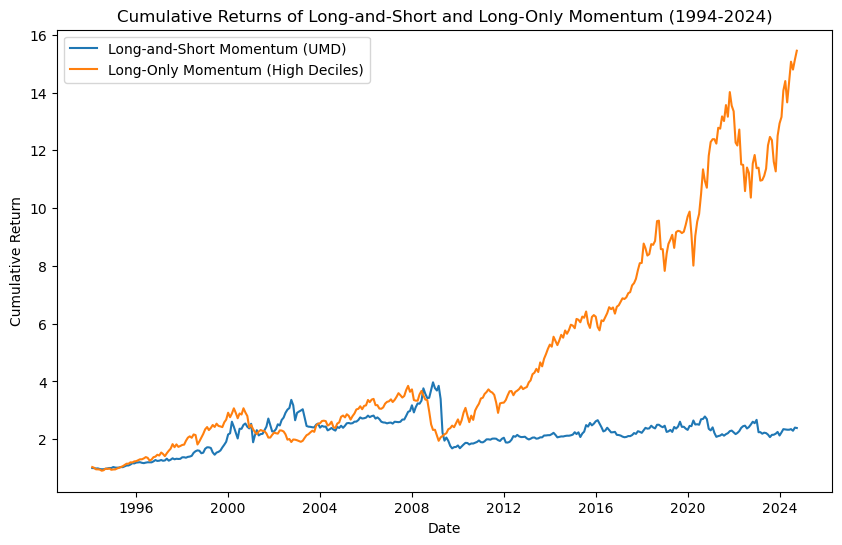

In [52]:
import matplotlib.pyplot as plt
cumulative_long_short = (1 + long_short_momentum).cumprod()
cumulative_long_only = (1 + long_only_momentum).cumprod()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_long_short, label="Long-and-Short Momentum (UMD)")
plt.plot(cumulative_long_only, label="Long-Only Momentum (High Deciles)")
plt.title("Cumulative Returns of Long-and-Short and Long-Only Momentum (1994-2024)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

## 3. 

(a)

In [53]:
# Construct `𝑟̂mom𝐷1`
momentum_D1 = momentum_deciles_data['Hi PRIOR'] - momentum_deciles_data['Lo PRIOR']

# Construct `𝑟̂mom𝐷3`
momentum_D3 = ((momentum_deciles_data['PRIOR 8'] + momentum_deciles_data['PRIOR 9'] + momentum_deciles_data['Hi PRIOR']) / 3) - \
              ((momentum_deciles_data['Lo PRIOR'] + momentum_deciles_data['PRIOR 2'] + momentum_deciles_data['PRIOR 3']) / 3)

# Construct `𝑟̂mom𝐷5`
momentum_D5 = (momentum_deciles_data[['PRIOR 6', 'PRIOR 7', 'PRIOR 8', 'PRIOR 9', 'Hi PRIOR']].mean(axis=1)) - \
              (momentum_deciles_data[['Lo PRIOR', 'PRIOR 2', 'PRIOR 3', 'PRIOR 4', 'PRIOR 5']].mean(axis=1))


In [54]:
def calculate_statistics(data):
    mean = data.mean()
    vol = data.std()
    sharpe = mean / vol
    skewness = data.skew()
    return mean, vol, sharpe, skewness

# Calculate statistics for each construction
mean_D1, vol_D1, sharpe_D1, skew_D1 = calculate_statistics(momentum_D1)
mean_D3, vol_D3, sharpe_D3, skew_D3 = calculate_statistics(momentum_D3)
mean_D5, vol_D5, sharpe_D5, skew_D5 = calculate_statistics(momentum_D5)

# Correlations with Market and Value for each construction
corr_mkt_D1 = momentum_D1.corr(factors_data['MKT'])
corr_val_D1 = momentum_D1.corr(factors_data['HML'])

corr_mkt_D3 = momentum_D3.corr(factors_data['MKT'])
corr_val_D3 = momentum_D3.corr(factors_data['HML'])

corr_mkt_D5 = momentum_D5.corr(factors_data['MKT'])
corr_val_D5 = momentum_D5.corr(factors_data['HML'])


In [55]:
results = pd.DataFrame({
    'Subsample': ['𝑟̂mom𝐷1', '𝑟̂mom𝐷3', '𝑟̂mom𝐷5'],
    'Mean': [mean_D1, mean_D3, mean_D5],
    'Vol': [vol_D1, vol_D3, vol_D5],
    'Sharpe': [sharpe_D1, sharpe_D3, sharpe_D5],
    'Skewness': [skew_D1, skew_D3, skew_D5],
    'Corr to Mkt': [corr_mkt_D1, corr_mkt_D3, corr_mkt_D5],
    'Corr to Value': [corr_val_D1, corr_val_D3, corr_val_D5]
})
print(results)

  Subsample      Mean       Vol    Sharpe  Skewness  Corr to Mkt  \
0   𝑟̂mom𝐷1  0.006834  0.086324  0.079169 -1.304629    -0.319715   
1   𝑟̂mom𝐷3  0.002379  0.055825  0.042619 -1.345002    -0.361659   
2   𝑟̂mom𝐷5  0.001368  0.038679  0.035357 -1.415925    -0.348584   

   Corr to Value  
0      -0.233463  
1      -0.211472  
2      -0.212234  


(b)
1-Decile offers the highest returns and risk, suitable for those seeking high risk-adjusted performance.
3-Decile provides a balance, offering moderate returns and volatility.
5-Decile gives the lowest returns and volatility, making it more stable but with lower expected returns.

(c)
For a retail product, it’s typically preferable to aim for lower volatility and a more stable return profile to attract a broader base of retail investors who might be risk-averse.

The 5-Decile construction may be more appropriate for a retail product due to its lower volatility (0.038679) and relatively stable, albeit lower, returns.


(d)
Mean for long-and short and 𝑟momD3 is similar with  𝑟momD3 lower than the long-short momentum strategy, indicating that the 3-decile approach provides a lower average return.
The 3-decile momentum strategy has a slightly higher volatility than the long-short strategy, suggesting a marginally higher risk profile.
The Sharpe ratio of 𝑟momD3 is lower, implying that the 3-decile strategy is less efficient in generating returns per unit of risk compared to the long-short momentum strategy.
Both strategies exhibit negative skewness, but 𝑟momD3 has a slightly less negative skewness, indicating fewer extreme negative returns.
The Sharpe ratio of 𝑟momD3 is lower, implying that the 3-decile strategy is less efficient in generating returns per unit of risk compared to the long-short momentum strategy.
The correlation to the market for 𝑟momD3 is similar but slightly more negative than for the long-short strategy, showing comparable behavior relative to the market.
The correlation to the value factor is also similar across both strategies, with the 3-decile momentum strategy showing slightly less correlation.

This suggests that the 3-decile momentum approach is less effective than the long-short strategy in delivering risk-adjusted returns, though it still behaves similarly in terms of market and value correlations.

Therefore, while 𝑟momD3 is somewhat comparable to the Fama-French construction, it is not as efficient in terms of return generation per unit risk.

## 4. 

(a)

In [56]:
size_sorts_data = pd.read_excel(file_path, sheet_name='size_sorts (total returns)')
rf_data = pd.read_excel(file_path, sheet_name='risk-free rate')

size_sorts_data['Date'] = pd.to_datetime(size_sorts_data['Date'])
size_sorts_data.set_index('Date', inplace=True)
rf_data['Date'] = pd.to_datetime(rf_data['Date'])
rf_data.set_index('Date', inplace=True)

# Filter data for the sample period 1994-2024
size_sorts_data = size_sorts_data[(size_sorts_data.index >= '1994-01-01') & (size_sorts_data.index <= '2024-12-31')]
rf_data = rf_data[(rf_data.index >= '1994-01-01') & (rf_data.index <= '2024-12-31')]


In [57]:
small_stock_momentum = size_sorts_data['SMALL HiPRIOR'] - size_sorts_data['SMALL LoPRIOR']
large_stock_momentum = size_sorts_data['BIG HiPRIOR'] - size_sorts_data['BIG LoPRIOR']

# Calculate risk-free adjusted returns for each
rf_adjusted_small = small_stock_momentum - rf_data['RF']
rf_adjusted_large = large_stock_momentum - rf_data['RF']
all_stocks_momentum = (rf_adjusted_small + rf_adjusted_large) / 2


# Define a function to calculate metrics
import numpy as np

def calculate_momentum_metrics(data):
    mean = data.mean()
    vol = data.std()
    sharpe = mean / vol
    skewness = data.skew()
    corr_to_market = data.corr(factors_data['MKT'])  
    return mean, vol, sharpe, skewness, corr_to_market

# Calculate metrics for small and large stock momentum portfolios
small_metrics = calculate_momentum_metrics(rf_adjusted_small)
large_metrics = calculate_momentum_metrics(rf_adjusted_large)
all_metrics = calculate_momentum_metrics(all_stocks_momentum)


# Display the results
print("Momentum Performance (1994-2024):")
print("Portfolio        Mean     Volatility   Sharpe   Skewness   Corr to Market")
print(f"All Stocks      {all_metrics}")
print(f"Small Stocks    {small_metrics}")
print(f"Large Stocks    {large_metrics}")



Momentum Performance (1994-2024):
Portfolio        Mean     Volatility   Sharpe   Skewness   Corr to Market
All Stocks      (0.0016510840108401083, 0.04828929239170205, 0.03419151387531675, -1.4651043929535894, -0.30580870971700375)
Small Stocks    (0.0033186991869918704, 0.04877757918257099, 0.0680373901822847, -1.789008044665484, -0.3040704861509906)
Large Stocks    (-1.6531165311653026e-05, 0.05263383224343577, -0.00031407869438795634, -0.8932976120420164, -0.27934029419694983)


(b)
The results indicate that small stocks drive the attractiveness of the momentum strategy, as they provide a higher mean return and Sharpe ratio compared to large stocks. Large stocks do not deliver comparable returns and exhibit slightly higher volatility, making them less effective for a momentum strategy. This suggests that the excess returns in a momentum strategy are primarily generated by small stocks, supporting the idea that the momentum effect is stronger in the small-stock segment.



## 5. 
The AQR retail product effectively captures Fama-French momentum features, particularly by segmenting stocks by size to harness the momentum premium. However, some adjustments could enhance its performance:

Reduce Focus on Large Stocks: Large stocks show weaker momentum effects; shifting focus toward small and mid-sized stocks could strengthen returns.

Improve Risk Management: High skewness in small-stock returns suggests potential large losses. Adding protective measures during high-volatility periods may appeal to risk-averse retail investors.

Incorporate Dynamic Adjustments: Adding time-varying momentum strategies (e.g., based on moving averages) could adapt the product better to changing market conditions.

Overall, the AQR product aligns well with Fama-French principles, but these tweaks may optimize its appeal and risk-adjusted returns.